In [1]:
# 한글폰트 설정
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

fontpath = 'c:/Windows/Fonts/malgun.ttf'
font = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font)

#plt.rc("font", family="AppleGothic")  # 맥인경우

plt.rc("axes", unicode_minus=False)  #-폰트 깨지는 문제 해결

In [2]:
# 데이터 분석을 위해 pandas를, 수치계산을 위해 numpy를, 시각화를 위해 seaborn을 불러옵니다.
import pandas as pd
import numpy as np
import seaborn as sns

# 구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

def visualize_silhouette(X_features):    
    # 실루엣 지수의 그래프 그려주기
    cluster_lists=range(2,10)
    
    result=[]
    for n_cluster in cluster_lists:
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        result.append(sil_avg)
        
    plt.plot(cluster_lists, result)
    plt.show()

In [4]:
def make_graph(df, name):
    df.dropna(subset='상호명', inplace=True)
    columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
    df_tmp=df[columns].copy()
    df_seoul=df_tmp[df_tmp['시도명'] =='서울특별시'].copy()
    df_seoul["상호명_소문자"] = df_seoul['상호명'].str.lower()
    df_cafe=df_seoul[ df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks') ]
    df_cafe=df_cafe[ df_cafe['상권업종중분류명']=='커피점/카페']

    coffee=[]
    for data in df_cafe['상호명_소문자']:
        if '스타벅스' in data or 'starbucks' in data:
            coffee.append('스타벅스')
        else:
            coffee.append('이디야')
    df_cafe['브랜드명']=coffee
    df_star=df_cafe[df_cafe['브랜드명']=='스타벅스']
    df_star.reset_index(drop=True, inplace=True)
    df_loc=df_star[['위도', '경도']]

    visualize_silhouette(df_loc)
    
    markers=['b-', 'g-', 'r-', 'c-', 'k-']
    cluster = KMeans(n_clusters = 5, max_iter=500, random_state=0)
    cluster_labels = cluster.fit_predict(df_loc)
    df_loc['cluster']=cluster_labels
    center=cluster.cluster_centers_
    plt.figure(figsize=(8,4))
    for i, marker in enumerate(markers):
        x_data=df_loc[df_loc['cluster']==i]['경도']
        y_data=df_loc[df_loc['cluster']==i]['위도']
        plt.scatter(x_data, y_data)
        plt.scatter(center[i][1],center[i][0], marker='*', c='black', s=100)
    plt.title(name[5:9], fontsize=15)
    plt.xlabel('경도')
    plt.ylabel('위도')

    plt.show()
    return center

In [5]:
import os
filelist=os.listdir("./data/coffee_data")
filelist

['상가업소_201512_01.csv',
 '상가업소_201612_01.csv',
 '상가업소_201712_01.csv',
 '상가업소_201812_01.csv',
 '상가업소_201912_01.csv',
 '상가업소_202012_01.csv',
 '상가업소_202112_01.csv']

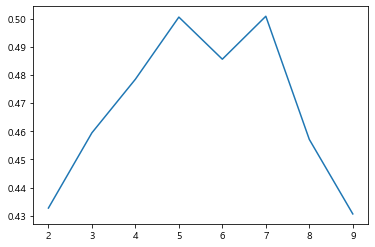

C:\Users\jhgf\AppData\Local\Temp\ipykernel_17372\1760017174.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['cluster']=cluster_labels


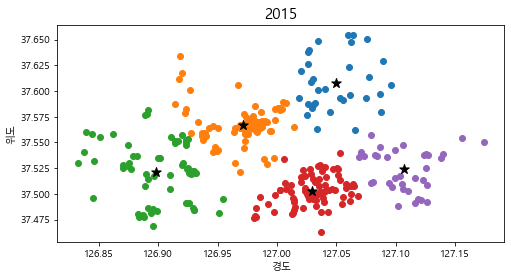

In [8]:
df=pd.read_csv("./data/coffee_data/"+filelist[0], encoding='cp949' )

center2015=make_graph(df, filelist[0])

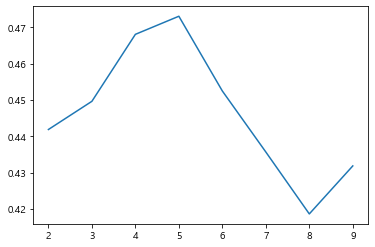

C:\Users\jhgf\AppData\Local\Temp\ipykernel_17372\1760017174.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['cluster']=cluster_labels


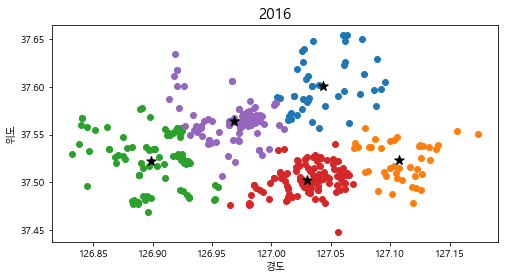

In [9]:
df=pd.read_csv("./data/coffee_data/"+filelist[1], encoding='cp949' )
center2016=make_graph(df, filelist[1])

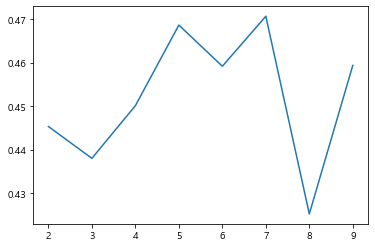

C:\Users\jhgf\AppData\Local\Temp\ipykernel_17372\1760017174.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['cluster']=cluster_labels


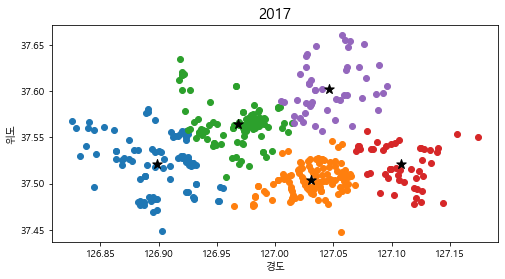

In [10]:
df=pd.read_csv("./data/coffee_data/"+filelist[2], encoding='utf-8' )
center2017=make_graph(df, filelist[2])

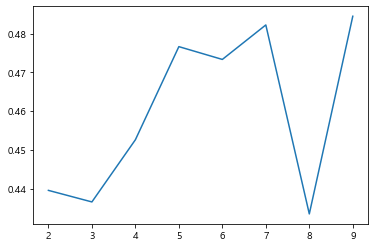

C:\Users\jhgf\AppData\Local\Temp\ipykernel_17372\1760017174.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['cluster']=cluster_labels


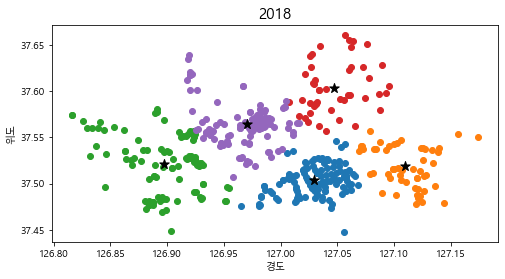

In [11]:
df=pd.read_csv("./data/coffee_data/"+filelist[3], encoding='cp949' )
center2018=make_graph(df, filelist[3])

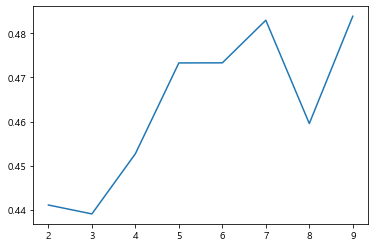

C:\Users\jhgf\AppData\Local\Temp\ipykernel_17372\1760017174.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['cluster']=cluster_labels


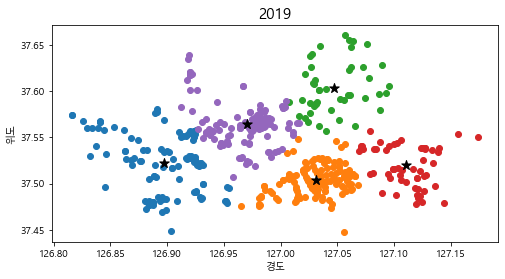

In [12]:
df=pd.read_csv("./data/coffee_data/"+filelist[4], encoding='utf-8', sep='|' )
center2019=make_graph(df, filelist[4])

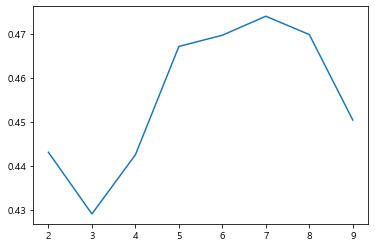

C:\Users\jhgf\AppData\Local\Temp\ipykernel_17372\1760017174.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['cluster']=cluster_labels


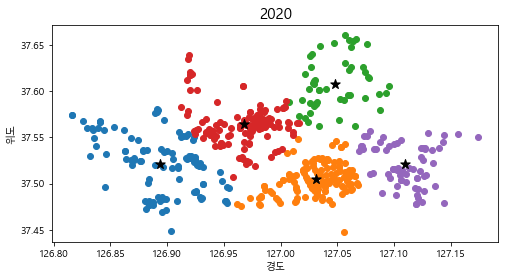

In [13]:
df=pd.read_csv("./data/coffee_data/"+filelist[5], encoding='utf-8',sep='|' )
center2020=make_graph(df, filelist[5])

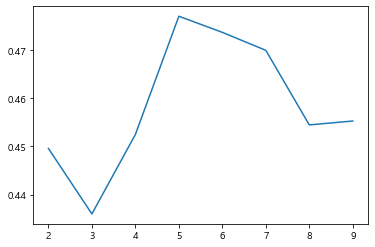

C:\Users\jhgf\AppData\Local\Temp\ipykernel_17372\1760017174.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['cluster']=cluster_labels


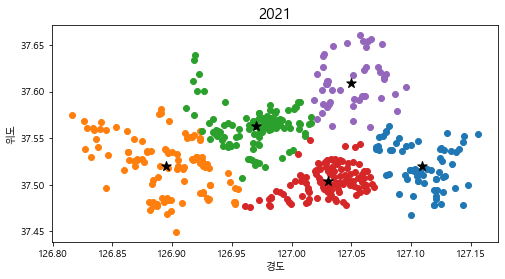

In [14]:
df=pd.read_csv("./data/coffee_data/"+filelist[6], encoding='cp949' )
center2021=make_graph(df, filelist[6])

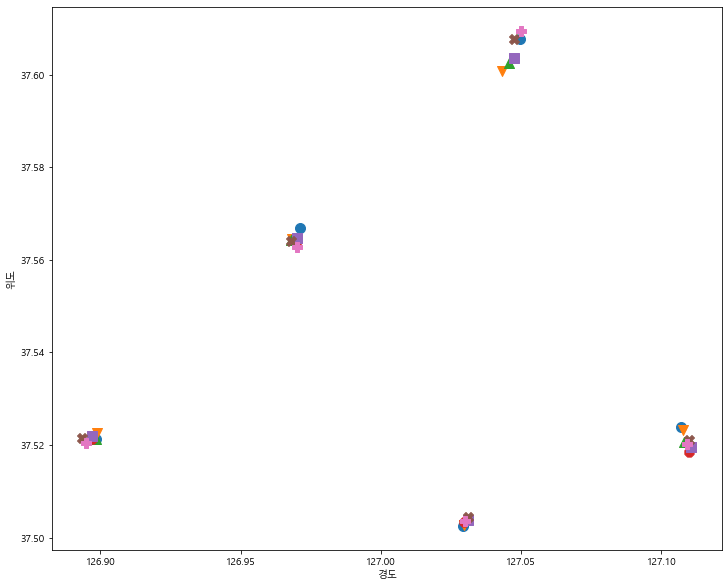

In [15]:
center_data=[center2015, center2016, center2017, center2018, center2019, center2020, center2021]
center=[]
for i in center_data:
    df=pd.DataFrame(i)
    df.columns=['위도', '경도']
    df.sort_values('위도', inplace=True)
    df.reset_index(drop=True, inplace=True)
    center.append(df)
    
markers=['o', 'v', '^', '8', 's', 'X', 'P']
plt.figure(figsize=(12,10))
i=0
for data in center:
    x_data=data["경도"]
    y_data=data["위도"]
    plt.scatter(x_data, y_data, marker=markers[i], s=100)
    plt.xlabel('경도')
    plt.ylabel('위도')
    i+=1

In [28]:
import folium  # 지도 시각화 모듈
import json
import numpy
from folium import Marker

df=pd.read_csv("./data/coffee_data/"+filelist[6], encoding='cp949' )
df.dropna(subset='상호명', inplace=True)
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
       '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
       '경도', '위도']
df_tmp=df[columns].copy()
df_seoul=df_tmp[df_tmp['시도명'] =='서울특별시'].copy()
df_seoul["상호명_소문자"] = df_seoul['상호명'].str.lower()
df_cafe=df_seoul[ df_seoul['상호명_소문자'].str.contains('스타벅스|starbucks') ]
df_cafe=df_cafe[ df_cafe['상권업종중분류명']=='커피점/카페']

coffee=[]
for data in df_cafe['상호명_소문자']:
    if '스타벅스' in data or 'starbucks' in data:
        coffee.append('스타벅스')
    else:
        coffee.append('이디야')
df_cafe['브랜드명']=coffee
df_star=df_cafe[df_cafe['브랜드명']=='스타벅스']
df_star.reset_index(drop=True, inplace=True)

df_loc=df_star[['위도', '경도']]

cluster = KMeans(n_clusters = 5, max_iter=500, random_state=0)
cluster_labels = cluster.fit_predict(df_loc)
df_loc['cluster']=cluster_labels


m=folium.Map(location=[37.533244, 126.953572], zoom_start=11)

colors=['pink', 'darkgreen', 'darkblue', 'lightgray', 'white']

for i, color in enumerate(colors):
    x_data=list(df_loc[df_loc['cluster']==i]['경도'])
    y_data=list(df_loc[df_loc['cluster']==i]['위도'])
    for j in range(len(x_data)):
        Marker( location=[ y_data[j], x_data[j] ], popup=str(i), icon=folium.Icon(color=color, icon='star') ).add_to(m)

display(m)

C:\Users\jhgf\AppData\Local\Temp\ipykernel_17372\3388876216.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_loc['cluster']=cluster_labels


In [35]:
# 밀도값 계산

center=cluster.cluster_centers_
df_loc

,위도,경도,cluster
0,37.582964,127.003887,2
1,37.484386,127.014198,3
2,37.527147,126.874682,1
3,37.611841,127.030685,4
4,37.523184,127.021629,3
...,...,...,...
462,37.467265,127.099909,0
463,37.562814,127.081329,0
464,37.619249,127.079298,4
465,37.554828,126.971712,2


In [38]:
# 하버사인 코드
from numpy import sin, cos, arccos, pi, round

def rad2deg(radians):
    degrees = radians * 180 / pi
    return degrees

def deg2rad(degrees):
    radians = degrees * pi / 180
    return radians

def getDistanceBetweenPointsNew(latitude1, longitude1, latitude2, longitude2, unit = 'miles'):
    
    theta = longitude1 - longitude2
    
    distance = 60 * 1.1515 * rad2deg(
        arccos(
            (sin(deg2rad(latitude1)) * sin(deg2rad(latitude2))) + 
            (cos(deg2rad(latitude1)) * cos(deg2rad(latitude2)) * cos(deg2rad(theta)))
        )
    )
    
    if unit == 'miles':
        return round(distance, 2)
    if unit == 'km':
        return round(distance * 1.609344, 2)

In [59]:
# 군집 중심을 기준으로 nkm 내에 있는 스타벅스 갯수 구하는 코드
result=[]
for i in range(5):
    num=0
    lat = center[i][0]
    long = center[i][1]
    distance=getDistanceBetweenPointsNew( lat, long, 
    df_loc[df_loc['cluster']==i]['위도'],
    df_loc[df_loc['cluster']==i]['경도'], unit= 'km')
    for data in distance:
        if data<=1.5:
            num+=1
    result.append(num)
result, np.array(result).sum()

([11, 9, 48, 34, 2], 104)